In [56]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
import sys
sys.path.append('..')

In [86]:
from autoplan.generator import ProgramGenerator
from grammars.test_structure.program import Program as TestStructureProgram, TestStructureLabels
from autoplan.dataset import build_synthetic_dataset
from autoplan.trainer import ParserTrainer, ClassifierTrainer
from autoplan.parsing import ProgramParser
from autoplan.token import JavaTokenizer
from autoplan.vis import plot_all_accuracy, plot_all_cm, plot_accuracy, plot_cm
from tqdm import tqdm_notebook as tqdm
import torch
import pandas as pd
from pprint import pprint

device = torch.device('cpu')
# device = torch.device('cuda:0')


In [81]:
dataset = build_synthetic_dataset(
    TestStructureLabels,
    N=1000, 
    tokenizer=JavaTokenizer(),
    generator=ProgramGenerator(grammar=TestStructureProgram()))

Generating programs...


  0%|          | 0/1000 [00:00<?, ?it/s]

Generated 32 unique programs.
Tokenizing programs...


100%|██████████| 1000/1000 [00:00<00:00, 2545.32it/s]

Building dataset metadata...


In [103]:
# trainer = ClassifierTrainer(dataset, device)
trainer = ParserTrainer(dataset, device)
losses = []
train_evals = []
val_evals = []

In [104]:
for _ in tqdm(range(20)):
    losses.append(trainer.train_one_epoch())
    train_eval, val_eval = trainer.eval()
    train_evals.append(train_eval)
    val_evals.append(val_eval)

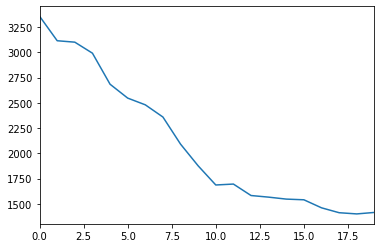

In [105]:
pd.Series(losses).plot()

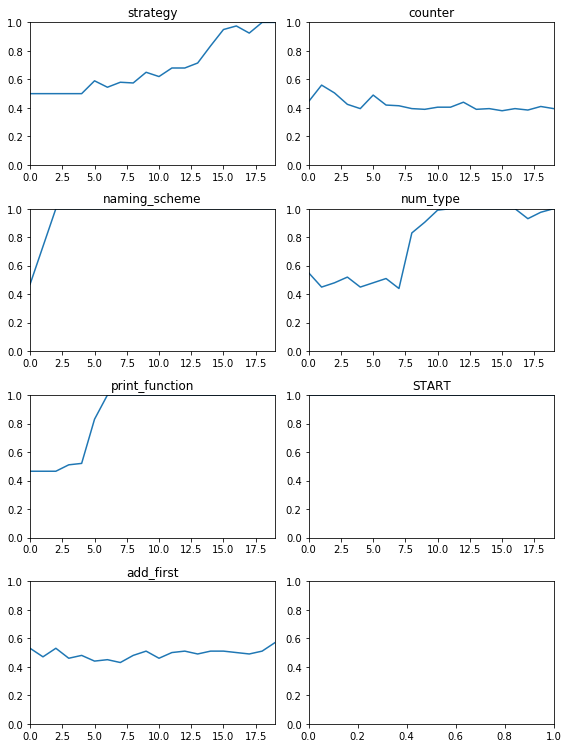

In [94]:
# When parsing run:
plot_all_accuracy(train_evals)
# When classifying run:
# plot_accuracy(train_evals)

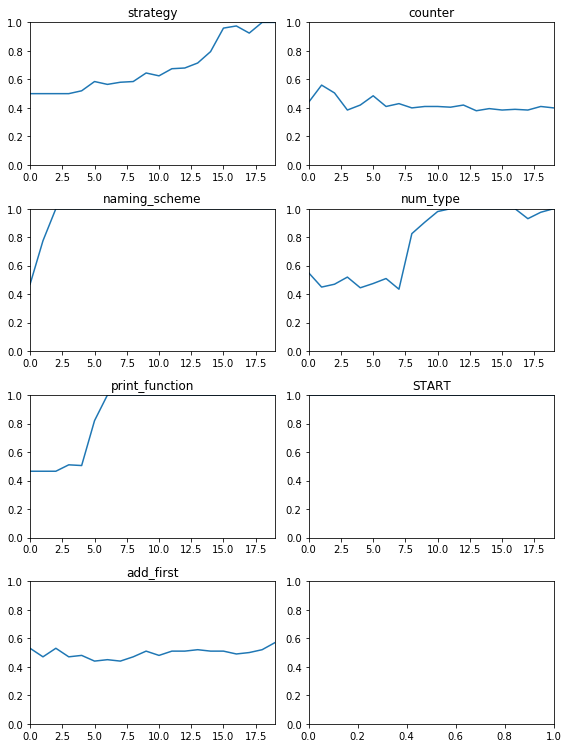

In [95]:
# When parsing run:
plot_all_accuracy(val_evals)
# When classifying run:
# plot_accuracy(val_evals)

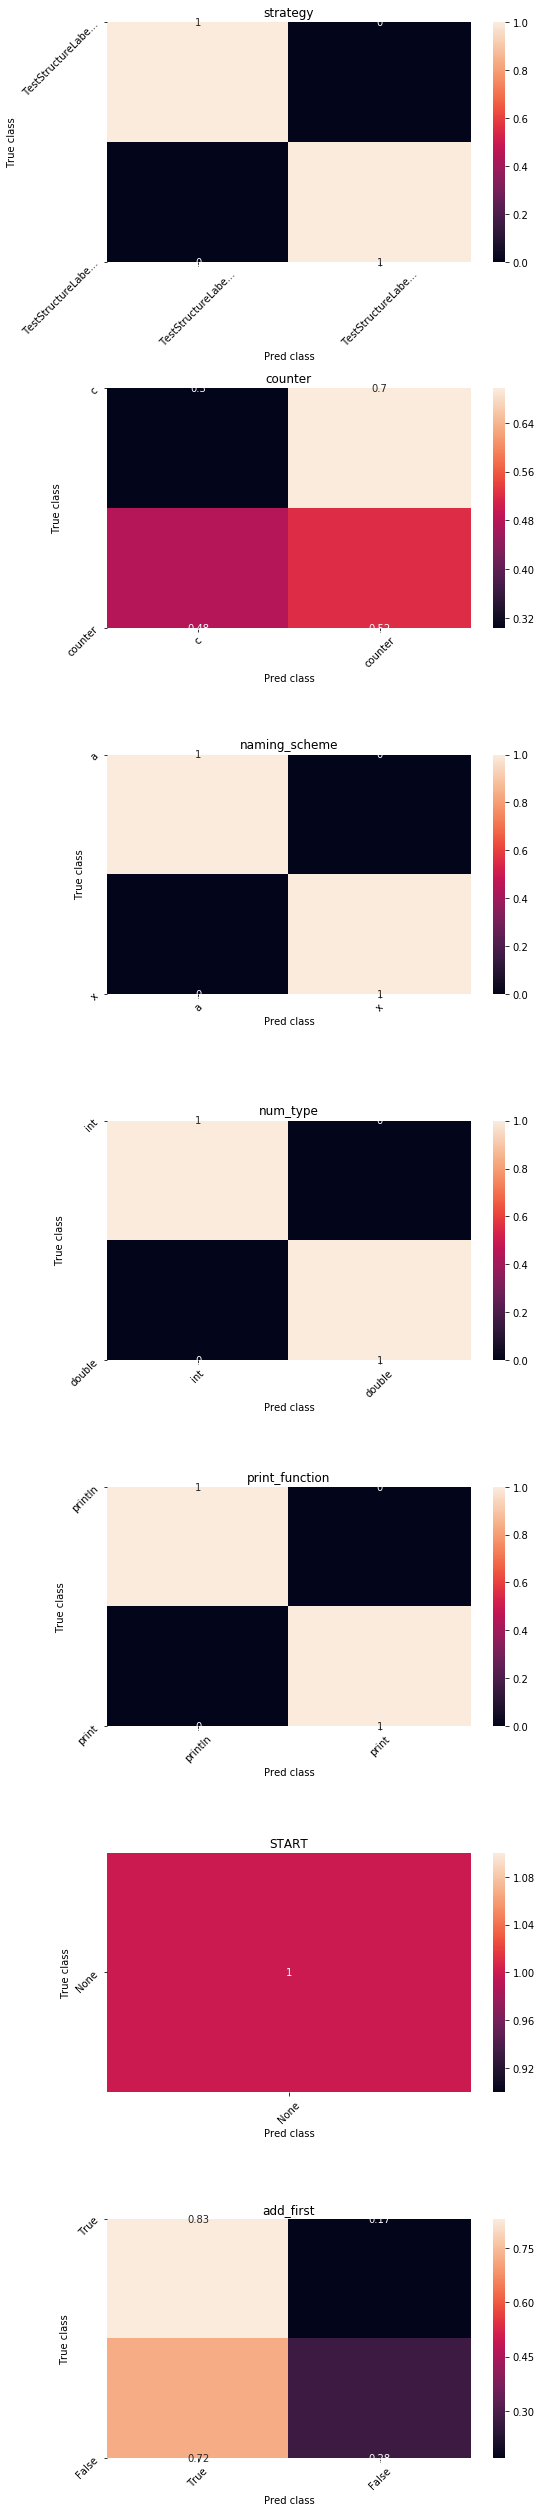

In [97]:
# When parsing run:
plot_all_cm(val_evals[-1])
# When classifying run:
# train_evals[-1].plot_cm()